In [1]:
import os
import pickle
import numpy as np
from sklearn.feature_selection import f_classif
from sklearn.metrics import auc
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

import sys
sys.path.append('..')
from familiarity.familiarization import _make_fbf_net_name, get_results, dprime_roc_auc
from familiarity.analysis import build_dist_mat_gen
from familiarity.commons import get_layers_of_interest
from familiarity.config import DATA_DIR

plt.style.use('ggplot')

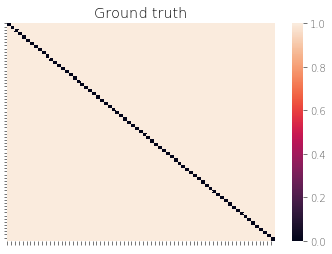

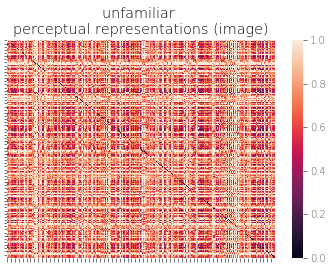

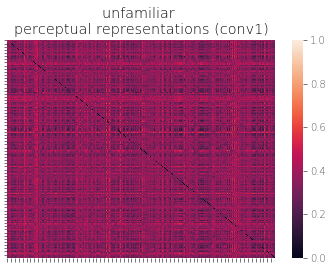

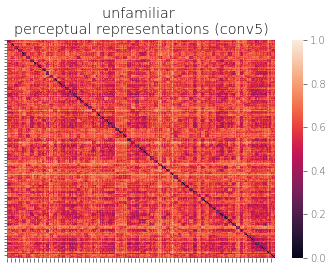

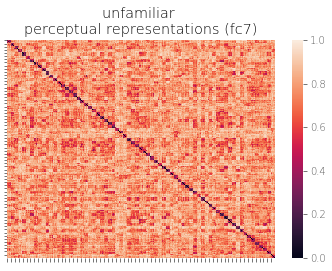

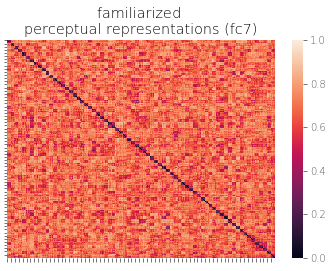

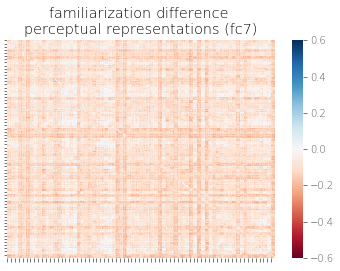

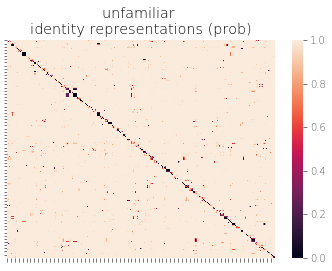

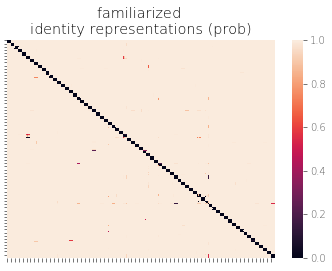

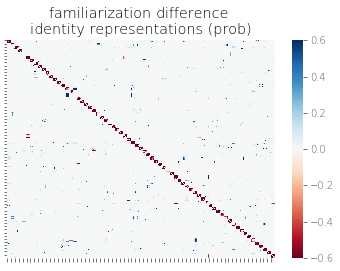

In [3]:
net = 'vgg16_train-vggface2-match-imagenet-subset'
dataset = 'lfw-deepfunneled'
dist_met = 'cosine'
normalize_dist = False
data_dir=os.path.join(DATA_DIR, 'fine_tuning')
show = True
save=True
norm_tag = '-normalized' if normalize_dist else ''
_, layer_names = get_layers_of_interest('vgg16')
layer_names = ['image', 'conv1', 'conv5', 'fc7', 'prob']
save_dir = '../figures'

if 'lfw' in dataset:
    id_thresh = 18
    n_val = 10
else:
    id_thresh = 20
    n_val = 19
if 'vggface2' in dataset:
    max_ids = 100
else:
    max_ids = None

dist_fams = []
dist_unfams = []
for ii, layer in enumerate(layer_names):
    dist_unfam, true = get_results('dist_mat', net, dataset, 0, layer, 
                                    distance_metric=dist_met,
                                    data_dir=data_dir,
                                    normalize_dist=normalize_dist,
                                    max_ids=max_ids, id_thresh=id_thresh, n_val=n_val)
    dist_unfams.append(dist_unfam)
    if ii == 0:
        g = sns.heatmap(1-true, vmin=0, vmax=1)
        g.set(xticklabels=[], yticklabels=[], yticks=np.arange(0,true.shape[0],10), xticks=np.arange(0,true.shape[0],10))
        plt.title('Ground truth')
        if save:
            plt.savefig(f'{save_dir}/dist_true_lfw-deepfunneled_18-10', bbox_inches='tight', dpi=400)
        if show:
            plt.show()
        plt.close()

    g = sns.heatmap(dist_unfam, vmin=0, vmax=1)
    g.set(xticklabels=[], yticklabels=[], yticks=np.arange(0,true.shape[0],10), xticks=np.arange(0,true.shape[0],10))
    if layer == 'prob':
        plt.title('unfamiliar \nidentity representations (prob)')
    else:
        plt.title(f'unfamiliar \nperceptual representations ({layer})')    
    if save:
        plt.savefig(f'{save_dir}/dist_{dist_met}{norm_tag}_layer-{layer}_{net}_{dataset}_{id_thresh}-{n_val}_unfamiliar', bbox_inches='tight', dpi=400)
    if show:
        plt.show()
    plt.close()

    if layer in ['fc6', 'fc7', 'prob']:
        dist_fam, true = get_results('dist_mat', net, dataset, 50, layer, 
                                        data_dir=data_dir,
                                        distance_metric=dist_met,
                                        normalize_dist=normalize_dist,
                                        max_ids=max_ids, id_thresh=id_thresh, n_val=n_val)
        dist_fams.append(dist_fam)

        g = sns.heatmap(dist_fam, vmin=0, vmax=1)
        g.set(xticklabels=[], yticklabels=[], yticks=np.arange(0,true.shape[0],10), xticks=np.arange(0,true.shape[0],10))
        if layer == 'prob':
            plt.title('familiarized \nidentity representations (prob)')
        else:
            plt.title(f'familiarized \nperceptual representations ({layer})')
        if save:
            plt.savefig(f'{save_dir}/dist_{dist_met}{norm_tag}_layer-{layer}_{net}_{dataset}_{id_thresh}-{n_val}_familiar', bbox_inches='tight', dpi=400)
        if show:
            plt.show()
        plt.close()

        g = sns.heatmap(dist_fam - dist_unfam, cmap='RdBu', vmin=-0.6, vmax=0.6)
        g.set(xticklabels=[], yticklabels=[], yticks=np.arange(0,true.shape[0],10), xticks=np.arange(0,true.shape[0],10))
        if layer == 'prob':
            plt.title('familiarization difference \nidentity representations (prob)')
        else:
            plt.title(f'familiarization difference \nperceptual representations ({layer})')        
        if save:
            plt.savefig(f'{save_dir}/dist_{dist_met}{norm_tag}_layer-{layer}_{net}_{dataset}_{id_thresh}-{n_val}_familiarity-diff', bbox_inches='tight', dpi=400)
        if show:
            plt.show()
        plt.close()